In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
from tensorflow.keras.datasets import mnist 

In [4]:
(X_train,y_train),(X_test,y_test) =  mnist.load_data()

11493376/11490434 [==============================] - 27s 2us/step


In [6]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
single_image = X_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

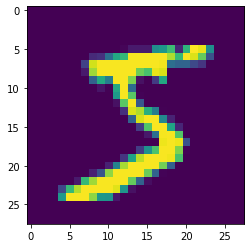

In [15]:
plt.imshow(single_image)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# One Hot Encoding

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train.shape

(60000,)

In [18]:
y_example = to_categorical(y_train)

y_example.shape

(60000, 10)

In [19]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

# Feature Scaling

In [23]:
single_image.max()

255

In [24]:
single_image.min()

0

In [25]:
X_train = X_train/255
X_test = X_test/255

In [32]:
scale_image = X_train[0]

scale_image.max()

1.0

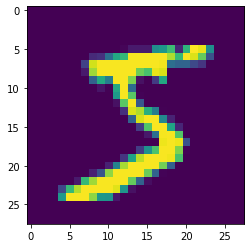

In [30]:
plt.imshow(single_image)

In [37]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28))

In [36]:
# batch_size,width,height,color_channels
X_train = X_train.reshape(60000,28,28,1)

In [38]:
X_test = X_test.reshape(10000,28,28,1)

# Training

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [45]:
model.fit(x=X_train,y=y_cat_train,epochs=10,callbacks=[early_stop],validation_data=(X_test,y_cat_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s 646us/sample - loss: 0.1373 - accuracy: 0.9592 - val_loss: 0.0544 - val_accuracy: 0.9830
Epoch 2/10
60000/60000 [==============================] - 35s 584us/sample - loss: 0.0473 - accuracy: 0.9853 - val_loss: 0.0506 - val_accuracy: 0.9834
Epoch 3/10
60000/60000 [==============================] - 44s 731us/sample - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0404 - val_accuracy: 0.9868
Epoch 4/10
60000/60000 [==============================] - 36s 594us/sample - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0425 - val_accuracy: 0.9866


In [49]:
metrics = pd.DataFrame(model.history.history)

metrics

,loss,accuracy,val_loss,val_accuracy
0,0.137336,0.959167,0.054427,0.9830
1,0.047332,0.985300,0.050641,0.9834
2,0.030664,0.990283,0.040355,0.9868
3,0.020441,0.993567,0.042459,0.9866


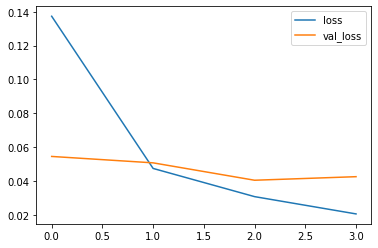

In [51]:
metrics[['loss','val_loss']].plot()

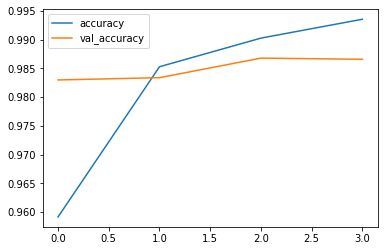

In [52]:
metrics[['accuracy','val_accuracy']].plot()

# prediction

In [53]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.04245924964984297, 0.9866]

In [54]:
prediction = model.predict_classes(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



[[ 968    1    3    3    0    3    1    0    1    0]
 [   0 1128    1    2    0    0    3    1    0    0]
 [   0    2 1020    5    0    0    0    4    0    1]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    1    0  972 

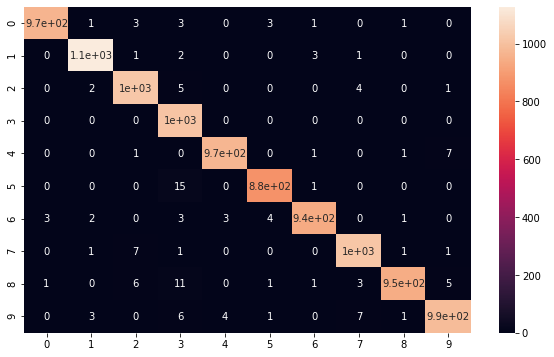

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

# Checking th model

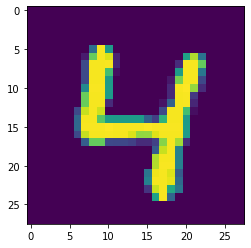

In [62]:
my_number = X_test[56]

plt.imshow(my_number.reshape(28,28))

In [64]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([4], dtype=int64)

# Saving Model

In [66]:
model.save('Mnist_digit_model')

INFO:tensorflow:Assets written to: Mnist_digit_model\assets
